# <center>EEG signal processing - basics</center>

### Exercises

#### Importing Data
1. Get the EEG/MEG dataset from https://mne.tools/0.11/auto_tutorials/plot_introduction.html?highlight=eeg#access-raw-data
2. Import data using standard import functions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap, compute_proj_ecg, compute_proj_eog)
import time

In [2]:
data_path = sample.data_path()
##Unfiltered data
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
##Filtered data
#raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

/Users/sreedevs/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif


In [3]:
raw = mne.io.Raw(raw_fname)
info = raw.info
print(info)
print(raw)

Opening raw data file /Users/sreedevs/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : 

#### Checking data structures
3. What are the various information in the data?
    - <p>Printing raw file gives information about SSP projector calculated to remove environmental noise from the MEG signals, plus a projector to mean reference the EEG channels. Which are represented as PCA components</p>
<p>Just by printing the loaded raw file some information can be obtained. It shows 376(number of channels) x 166800 (no of times) (277.7 sec), and approximate size is 482.2 MB </p>

4. How are they structured?
    - raw : is an object, instance of mne.raw.Raw
    - info : dict
    - ch_names : list of str 
    - n_times : int 
    - times : ndarray (numpy array)
5. Can you extract each of them separately? How?
    - 
    <p>Various methods are defined for the RAW class. Using these methods we can extract the data. Example is shown in exercise 6, printing the channel names</p>
<p>For example we can also show selecting eog channel by indices and plotting it</p>

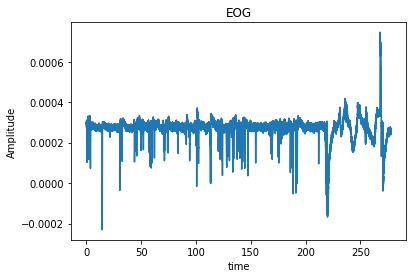

In [4]:
eog_channel_indices = mne.pick_types(raw.info, meg=False, eeg=False, eog= True)
eog_data, times = raw[eog_channel_indices]
x = plt.plot(times, eog_data[0])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title("EOG")
plt.show()

6. Can you list all the channel names? 
7. List only all EEG channel labels?

In [5]:
#All the channel Names
print(raw.ch_names)


meg_ch = [x for x in raw.ch_names if x.startswith('MEG')]

eeg_ch = [x for x in raw.ch_names if x.startswith('EEG')]

eog_ch = [x for x in raw.ch_names if x.startswith('EOG')]

sti_ch = [x for x in raw.ch_names if x.startswith('STI')]

channel_name = ['MEG','EEG','STI','EOG']
channel_length = [len(meg_ch),len(eeg_ch),len(sti_ch),len(eog_ch)]

print("Total number of channels {}".format(len(raw.ch_names)))
x = [print("Number of {} channels {}".format(x,y)) for x,y in zip(channel_name, channel_length)]

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

In [6]:
#EEG Channels
print('\n'.join(eeg_ch))

EEG 001
EEG 002
EEG 003
EEG 004
EEG 005
EEG 006
EEG 007
EEG 008
EEG 009
EEG 010
EEG 011
EEG 012
EEG 013
EEG 014
EEG 015
EEG 016
EEG 017
EEG 018
EEG 019
EEG 020
EEG 021
EEG 022
EEG 023
EEG 024
EEG 025
EEG 026
EEG 027
EEG 028
EEG 029
EEG 030
EEG 031
EEG 032
EEG 033
EEG 034
EEG 035
EEG 036
EEG 037
EEG 038
EEG 039
EEG 040
EEG 041
EEG 042
EEG 043
EEG 044
EEG 045
EEG 046
EEG 047
EEG 048
EEG 049
EEG 050
EEG 051
EEG 052
EEG 053
EEG 054
EEG 055
EEG 056
EEG 057
EEG 058
EEG 059
EEG 060


8. How are the data structure of channel labels different from the time series?
    - <p>Channel labels are list of strings, where as time series is ndarray</p>

9. Can you find any meta information about the data?
    - <p><b>mne.info()</b> is a class, which include a  datastructure made out of available python data types. Channel names, channel list are stored as list. And proper data types are used to represent other fields.</p>
<p>Printing info gives a lot of information about the raw data. Including channel names, bad channels, channel list, device to head transformation, digitization, info about project (project name, subject info etc), filtering done, etc </p>

10. What were the filters already applied in the data during recording?
    - <p>High pass filtering at 0.1 Hz <br>Low pass filtering at 172.17 Hz.<br>So the signal is band pass, having frequency components from 0.1 Hz to 172.17 Hz</p>
11. Do you find something like channel type? What are the types in your signal?
    - <p>Channel types represents the data that channel contains. Various channel types in this data are MEG, EEG, STI, EOG</p>

#### Plotting RAW data
12. Plot the raw data - grouped by  channel type (MEG, EEG, STI channels) - How do they look?
    1. What is the typical amplitude of different channel types?
        - <p>Average Amplitudes</p>
          <p>MEG - 400 ff/cm</p>
          <p>EEG - 20 uV</p>
          <p>EOG - 150 uV</p>
    - Do you find any large fluctuations? If yes, what is the probable source?
        - In some channels, some fluctuations can be seen. Which seems like interfernce from ECG and EOG. Shapes are comparable
        - In EEG the main fluctuation seems to be from EOG
    - Can you find and plot the ECG/EOG channels?
    - How does the STI channel differ from other channels?
        - STI channels contain the time information about the stimulus. It is used for synchronisation. And doesn't represent time series of signal like others
13. Can you find an STI channel? What is it?
    - There are 9 STI channels. Represents time of stimulus or activity.

Reading 0 ... 166799  =      0.000 ...   277.714 secs...


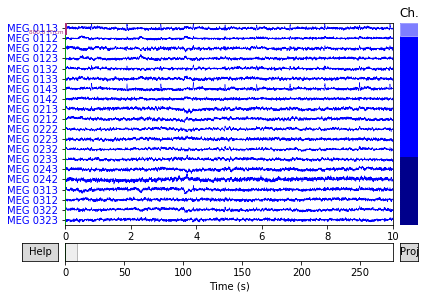

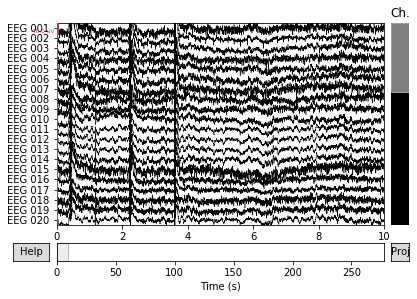

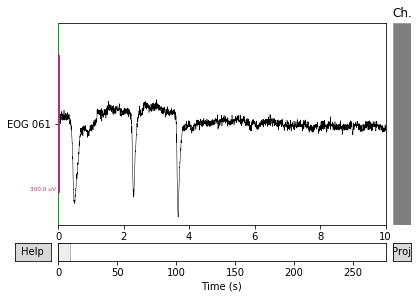

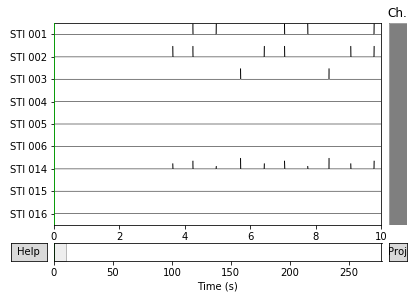

In [7]:
raw.load_data()
x = raw.copy().pick_types(meg=True).plot()
x = raw.copy().pick_types(meg=False, eeg=True).plot()
x = raw.copy().pick_types(meg=False, eog=True).plot()
x = raw.copy().pick_types(meg=False, stim=True).plot()
x = raw.copy().pick_types(meg=False, eog=True)

### Filtering data
14. Separate out only the EEG channels for this exercise.
15. Run both IIR and FIR bandpass filters 
    - How long does it take?
        - FIR - 2.20 s
        - IIR - 1.10
    - How different are the outputs?
        - Output of IIR filter seems to be smoother, but observation is subjective. No other difference could be observed


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 19821 samples (33.001 sec)



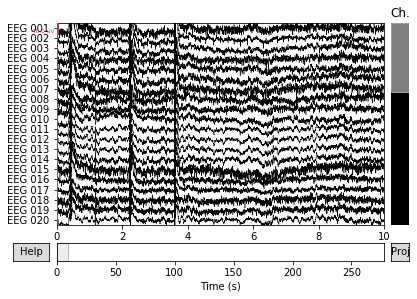

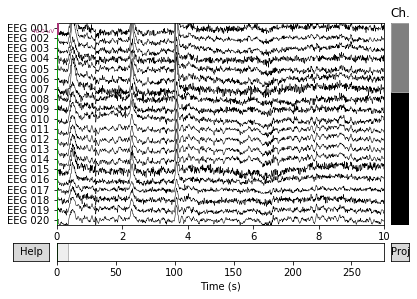

Time for FIR filter  2.4904120000000027


In [8]:
rawf = raw.copy()
t1 = time.process_time()

rawf.filter(0.1, 40, picks=['eeg'], method='fir')
t2 = time.process_time()
x = raw.copy().pick_types(meg=False, eeg=True).plot()

x = rawf.pick_types(meg=False, eeg=True).plot()

print("Time for FIR filter ", t2-t1)
del rawf

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 40.00 Hz: -6.02, -6.02 dB



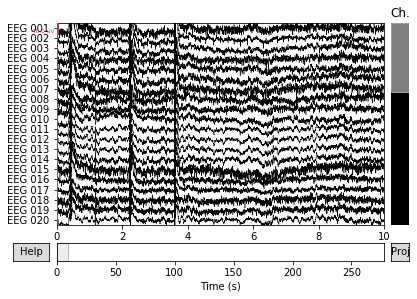

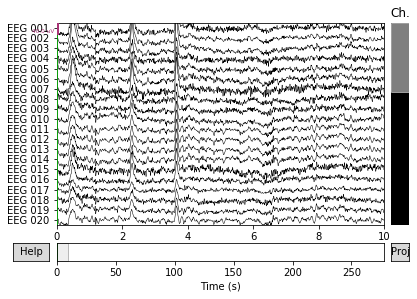

Time for IIR filter  1.0981819999999978


In [9]:
rawf = raw.copy()
t1 = time.process_time()

rawf.filter(0.1, 40, picks=['eeg'], method='iir')
t2 = time.process_time()
x = raw.copy().pick_types(meg=False, eeg=True).plot()

x = rawf.pick_types(meg=False, eeg=True).plot()

print("Time for IIR filter ", t2-t1)
del rawf

### Artefact rejection
16. ECG rejection
    1. Try running and ICA and plotting ICA components in topographical format. Can you identify and reject the ECG artifactual components? 
    - Compare the pre- vs post-rejection data? Does it look cleaner?
    - Try using SSP to perform the same operation? Contrast outputs. 
17. EOG rejection
    1. Try running and ICA and plotting ICA components in topographical format. Can you identify and reject the EOG artifactual components? 
    - Compare the pre- vs post-rejection data? Does it look cleaner?
    - Try using SSP to perform the same operation? Contrast outputs. 

#### ICA

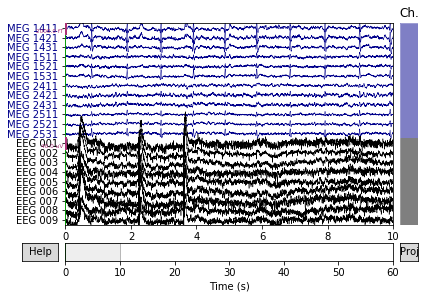

In [10]:
raw.crop(tmax=60.)
# pick some channels that clearly show heartbeats and blinks
regexp = r'(MEG [12][45][123]1|EEG 00.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
x = raw.plot(order=artifact_picks, n_channels=len(artifact_picks))

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected : 10
10 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 10 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


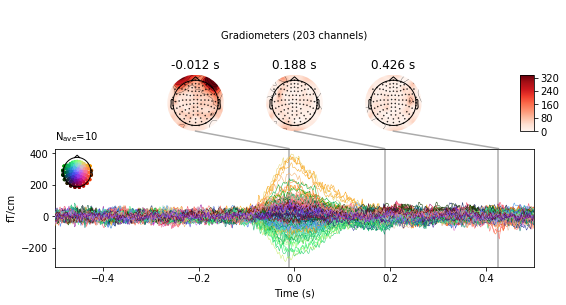

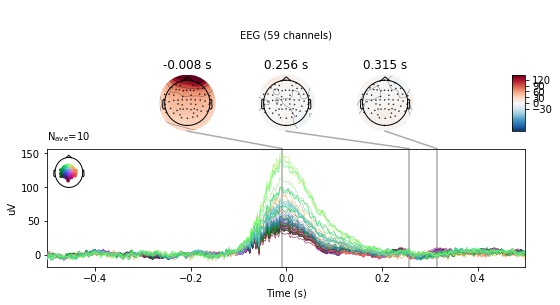

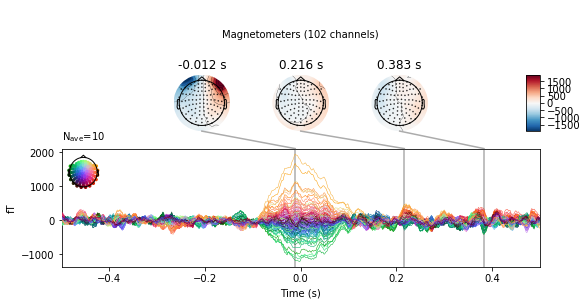

In [11]:
## creating EOG signal by epoching, which can be later used for eog rejection
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
x = eog_evoked.plot_joint()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
59 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 59 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


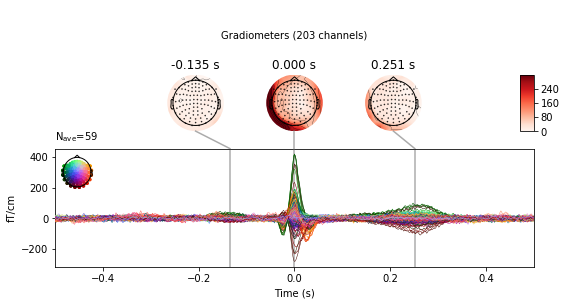

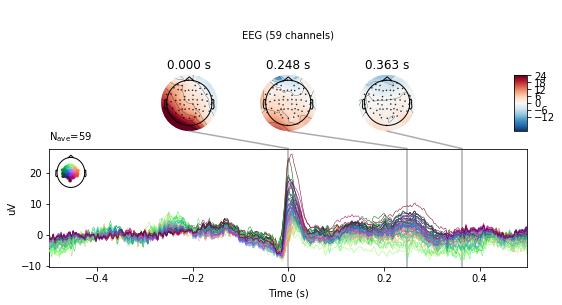

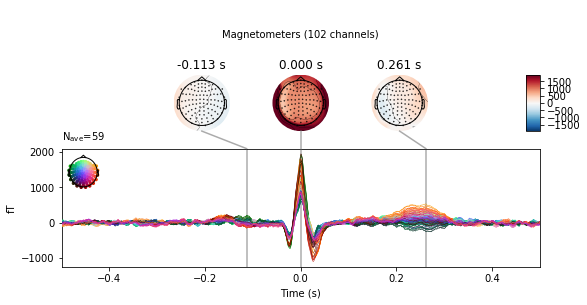

In [12]:
# Creating ECG signal by epoching, which can be later used for ECG rejection
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
x = ecg_evoked.plot_joint()

In [13]:
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=0.1, h_freq=None)
ica = ICA(n_components=15, random_state=97)
ica.fit(filt_raw)#,picks="eeg")

del filt_raw

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 19821 samples (33.001 sec)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 15 components
Fitting ICA took 4.8s.


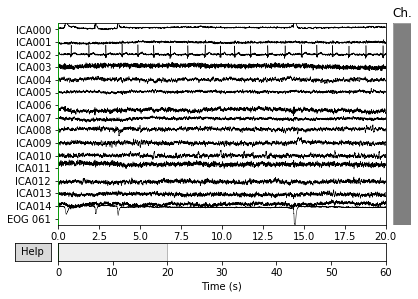

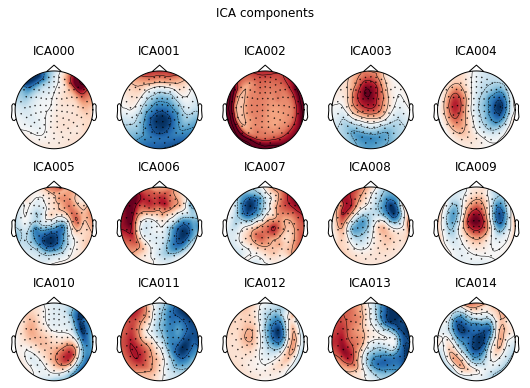

In [14]:
x = ica.plot_sources(raw)
x = ica.plot_components()

Reconstructing ECG signal from Magnetometers
... filtering ICA sources
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

... filtering target
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff

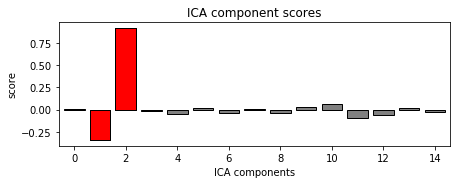

[ 0.91583414 -0.34310197]
    Using multitaper spectrum estimation with 7 DPSS windows
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


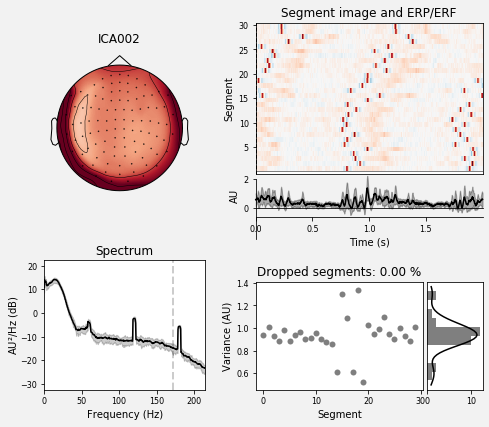

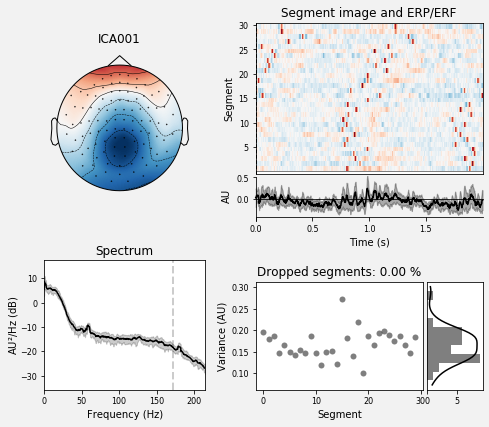

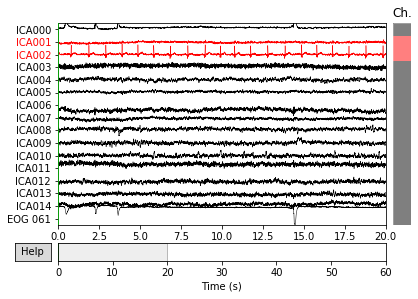

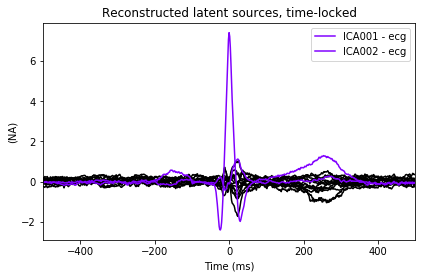

In [15]:
#ica.exclude = []
# find which ICs match the ECG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw, method='correlation')
ica.exclude = ecg_indices

# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)
print(ecg_scores[ecg_indices])
# plot diagnostics
ica.plot_properties(raw, picks=ecg_indices)

# plot ICs applied to raw data, with ECG matches highlighted
ica.plot_sources(raw)

# plot ICs applied to the averaged ECG epochs, with ECG matches highlighted
x = ica.plot_sources(ecg_evoked)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 s

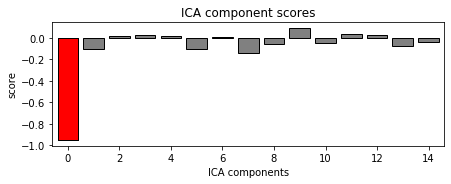

[0.01207818]
    Using multitaper spectrum estimation with 7 DPSS windows
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


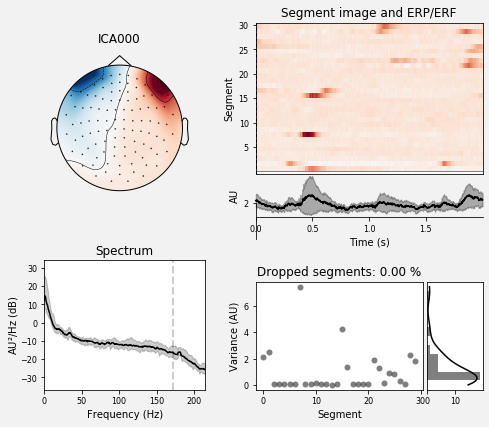

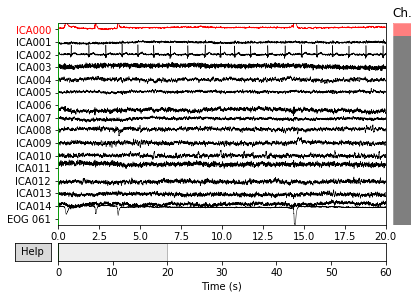

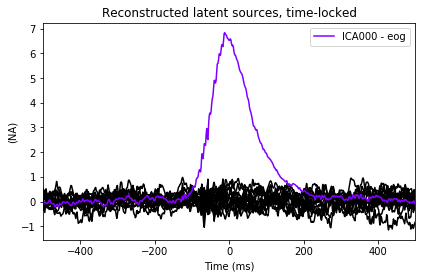

In [16]:
#ica.exclude = []
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)
print(ecg_scores[eog_indices])
# plot diagnostics
ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
x = ica.plot_sources(eog_evoked)

Transforming to ICA space (15 components)
Zeroing out 2 ICA components


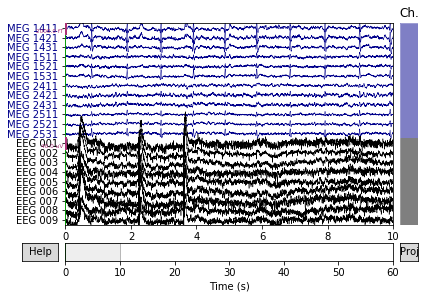

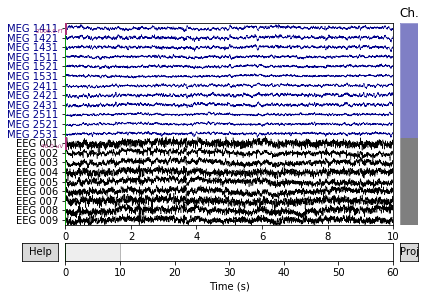

In [17]:
#Excluding ICA0 and ICA2 based on plots. ICA1 also shows correlation, but not removing that component

ica.exclude = [0, 2]  # indices chosen based on various plots above
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

raw.plot(order=artifact_picks, n_channels=len(artifact_picks))
ica_plot = reconst_raw.plot(order=artifact_picks, n_channels=len(artifact_picks))
del reconst_raw

#### SSP

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
59 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 59 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


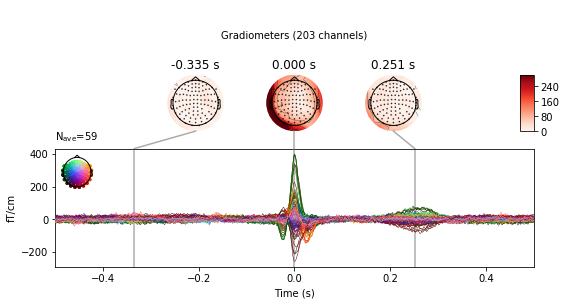

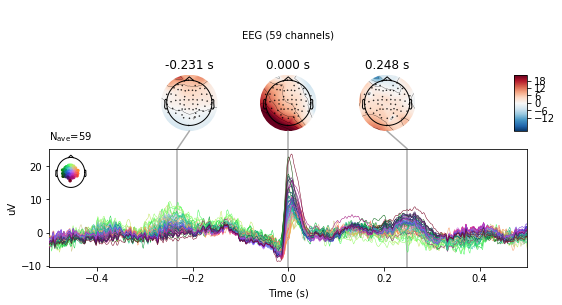

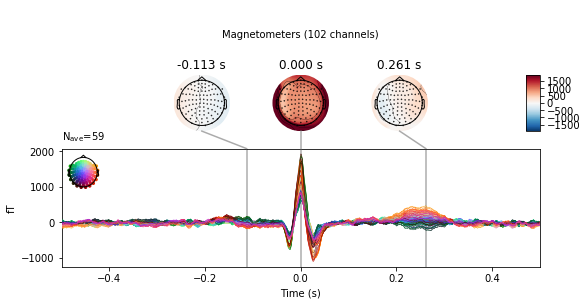

Including 3 SSP projectors from raw file
Running ECG SSP computation
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 58 (average pulse 57 / min.)
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filt

In [18]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline((None, None))
ecg_evoked.plot_joint()
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=1, reject=None)

[<Projection  |  ECG-planar--0.200-0.400-PCA-01, active : False, n_channels : 203>, <Projection  |  ECG-axial--0.200-0.400-PCA-01, active : False, n_channels : 102>, <Projection  |  ECG-eeg--0.200-0.400-PCA-01, active : False, n_channels : 59>]


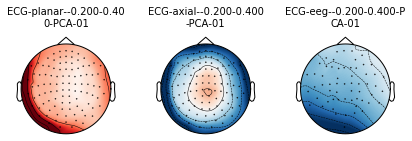

In [19]:
ecg_projs = projs[3:]
print(ecg_projs)
x = mne.viz.plot_projs_topomap(ecg_projs, info=raw.info)

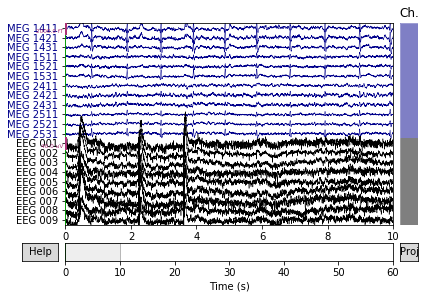

3 projection items deactivated


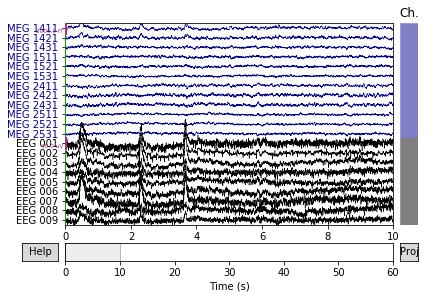

In [20]:
rawf = raw.copy()
for title in ('Without', 'With'):
    if title == 'With':
        rawf.add_proj(ecg_projs)
    fig = rawf.plot(order=artifact_picks, n_channels=len(artifact_picks))
    fig.subplots_adjust(top=0.9)  # make room for title
    fig.suptitle('{} ECG projectors'.format(title), size='xx-large',
                 weight='bold')

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected : 10
10 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 6)
Loading data for 10 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


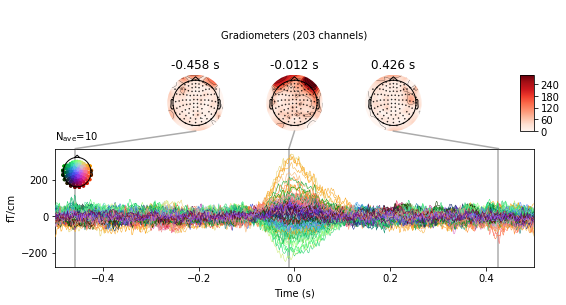

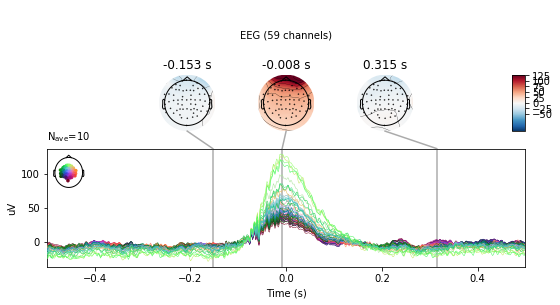

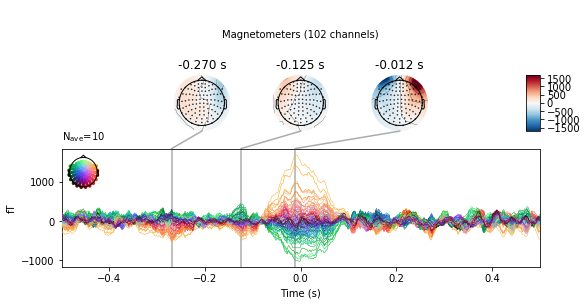

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [21]:
#Taking raw file with ECG artifact removed
eog_evoked = create_eog_epochs(rawf).average()
eog_evoked.apply_baseline((None, None))
eog_evoked.plot_joint()

In [22]:
eog_projs, _ = compute_proj_eog(rawf, n_grad=1, n_mag=1, n_eeg=1, reject=None,
                                no_proj=True)

Running EOG SSP computation
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected : 10
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---

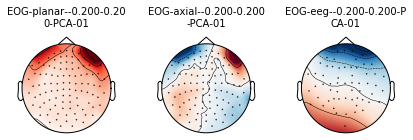

In [23]:
x=mne.viz.plot_projs_topomap(eog_projs, info=rawf.info)

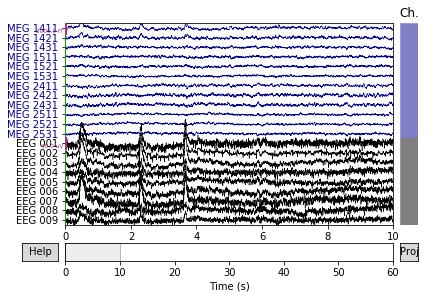

3 projection items deactivated


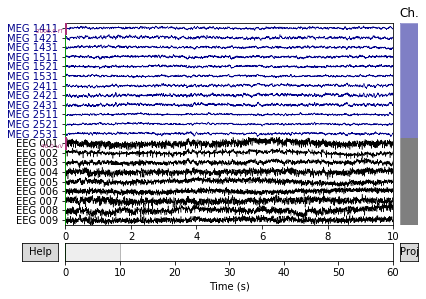

In [24]:
for title in ('Without', 'With'):
    if title == 'With':
        rawf.add_proj(eog_projs)
    ssp_plot = fig = rawf.plot(order=artifact_picks, n_channels=len(artifact_picks))
    fig.subplots_adjust(top=0.9)  # make room for title
    fig.suptitle('{} EOG projectors'.format(title), size='xx-large',
                 weight='bold')
del rawf

#### ICA vs SSP
- On contrast, SSP is looking a bit cleaner compared with ICA

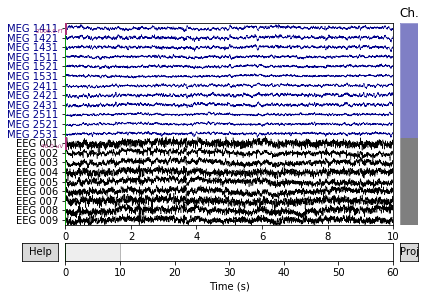

In [25]:
ica_plot

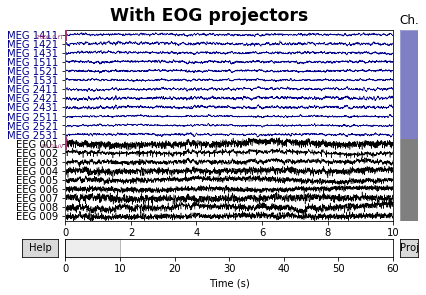

In [26]:
ssp_plot

### Epoching
18. Can we now epoch or split data based on events i.e., stimulus presentation times?
    - Yes, we can use mne.find_events() to identify stimulus times. Which can be used to annotate the data with mne.Annotation() to epoch the data 
19. What does the data structure look like? What does the time series vector look like? 
    - events are stored as a numpy ndarray
    - Using info on Epoch class gives similar types as raw.info, with events
    - Time series vector is still numpy ndarray. The annotations are given by the annotations we set using raw.set_annotations()
20. Average the trials/epochs to create an evoked potential structure.


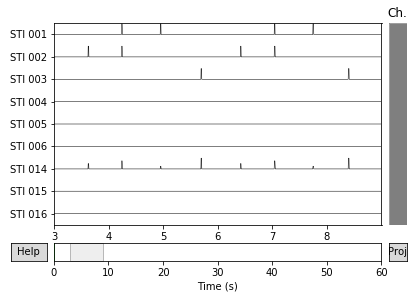

86 events found
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]
<class 'numpy.ndarray'>


In [27]:
x = raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6)
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5
print(type(events))

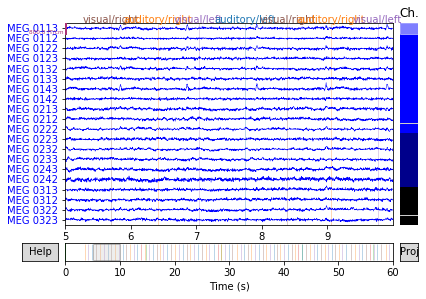

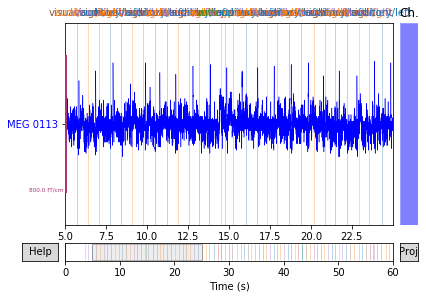

In [28]:
mapping = {1: 'auditory/left', 2: 'auditory/right', 3: 'visual/left',
           4: 'visual/right', 5: 'smiley', 32: 'buttonpress'}
onsets = events[:, 0] / raw.info['sfreq']
durations = np.zeros_like(onsets)  # assumes instantaneous events
descriptions = [mapping[event_id] for event_id in events[:, 2]]
annot_from_events = mne.Annotations(onset=onsets, duration=durations,
                                    description=descriptions,
                                    orig_time=raw.info['meas_date'])
raw.set_annotations(annot_from_events)
x = raw.plot(start=5, duration=5)
x = raw.copy().pick_channels(['MEG 0113']).plot(start=5,duration=20)

### Plotting evoked data
21. Plot the epoched data as a time series with all trials overlapped. Is the time axis correct?
    - Time is selected from 0.1 s before the stimulus to 1 s after the stimulus. 
        - 0.1 s is selected as pre stimulus baseline, 1 s of post stimulus active period is also observed
22. Plot the time series of the averaged evoked potential (EP) - in overlapping channels and topographical format with each channel displaying the averaged EP.
23. Plot the topographical plot of the EP for relevant time windows.
    1. What time windows are relevant for that particular paradigm?
        - We have to take optiomum pre stimulus baseline and optimum activation time to understand what is happening when we give a stimulus. 
        - I have tried creating the epochs from -0.5 s to 1 s, and initial time between -0.5 to -0.1 s doesn't seem to give any relevent information. So we can select the baseline from -0.1 to 0.0 s
    - Is there anything interesting in the topographical plot?
        - In case of audiotry stimulus, after about 0.8 s of stimulus we can see the dipole
            - Left stimulation shows a dipole from right to left and right stimulation shows from left to right
    - Does the activation fit with the known sources of the evoked potential?
        - Yes. For auditory stimulation we expect evoked potential from auditory cortex, which seems to fit the topoplot
        - And for visual stimulation we can see the evoked potential in occipital lobe

78 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 78 events and 902 original time points ...
1 bad epochs dropped
<Epochs  |   77 events (all good), -0.499488 - 1.00064 sec, baseline [None, 0], ~202.9 MB, data loaded,
 'Auditory/Left': 20
 'Auditory/Right': 20
 'visual/left': 19
 'visual/right': 18>


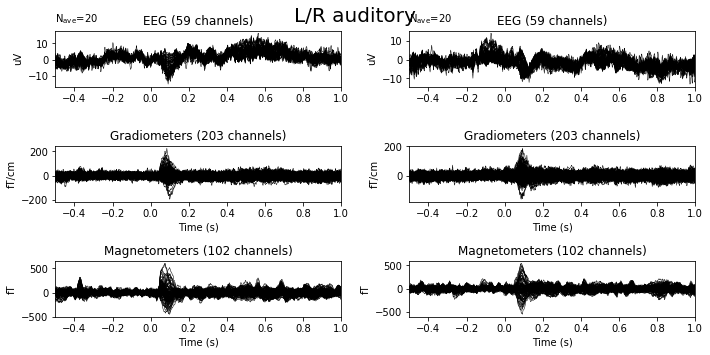

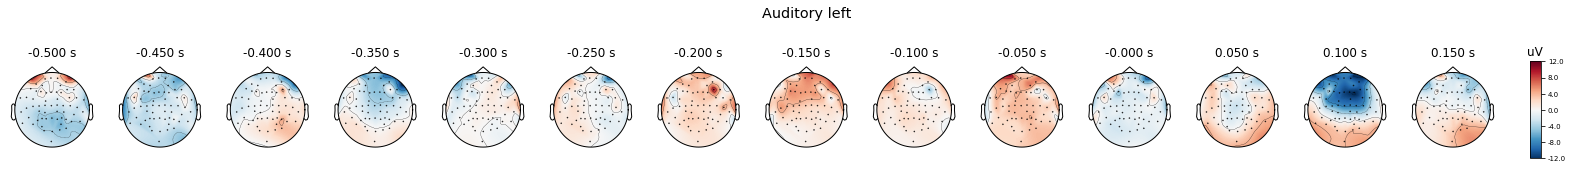

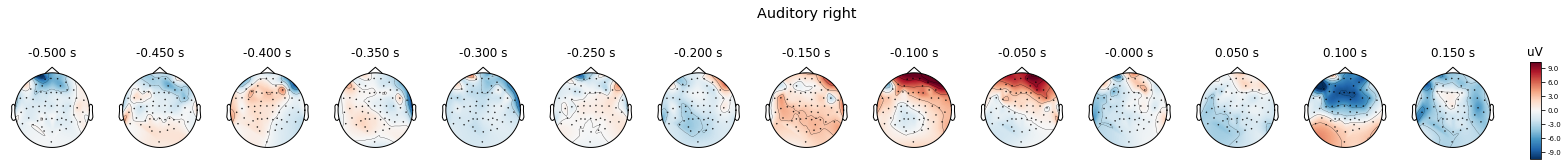

In [29]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2, 'visual/left' : 3, 'visual/right' : 4}
epochs = mne.Epochs(raw, events, event_id, tmin=-0.5, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)
ev_aud_left = epochs['Auditory/Left'].average()
ev_aud_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('L/R auditory', fontsize=20)
_ = ev_aud_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_aud_right.plot(axes=axs[:, 1], show=False, time_unit='s')

times = np.arange(-0.5, 0.151, 0.05) 
x = mne.Evoked.plot_topomap(ev_aud_left,times=times, ch_type='eeg', time_unit='s', title="Auditory left") 
x = mne.Evoked.plot_topomap(ev_aud_right,times=times, ch_type='eeg', time_unit='s', title="Auditory right") 

78 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 78 events and 662 original time points ...
1 bad epochs dropped
<Epochs  |   77 events (all good), -0.0998976 - 1.00064 sec, baseline [None, 0], ~149.9 MB, data loaded,
 'Auditory/Left': 20
 'Auditory/Right': 20
 'visual/left': 19
 'visual/right': 18>


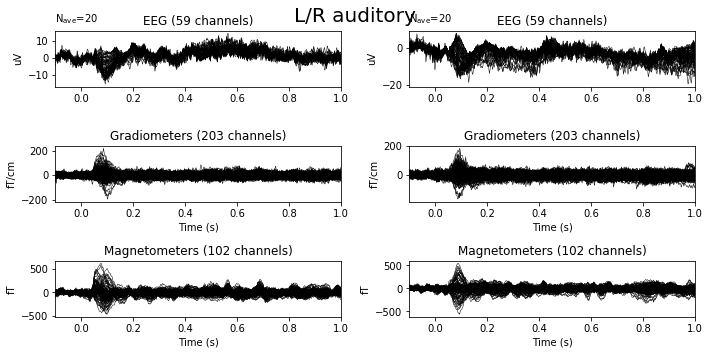

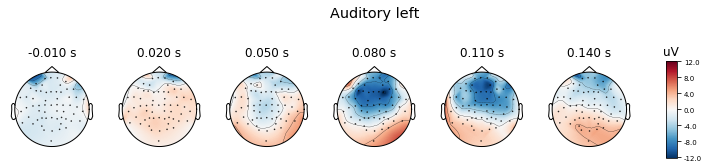

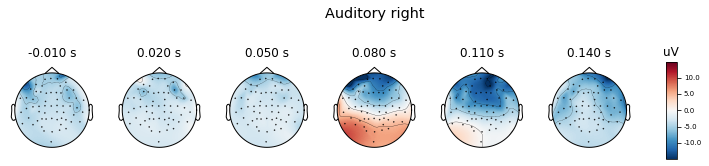

In [30]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2, 'visual/left' : 3, 'visual/right' : 4}
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)
ev_aud_left = epochs['Auditory/Left'].average()
ev_aud_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('L/R auditory', fontsize=20)
_ = ev_aud_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_aud_right.plot(axes=axs[:, 1], show=False, time_unit='s')

times = np.arange(-0.01, 0.151, 0.03) 
x = mne.Evoked.plot_topomap(ev_aud_left,times=times, ch_type='eeg', time_unit='s', title="Auditory left") 
x = mne.Evoked.plot_topomap(ev_aud_right,times=times, ch_type='eeg', time_unit='s', title="Auditory right") 

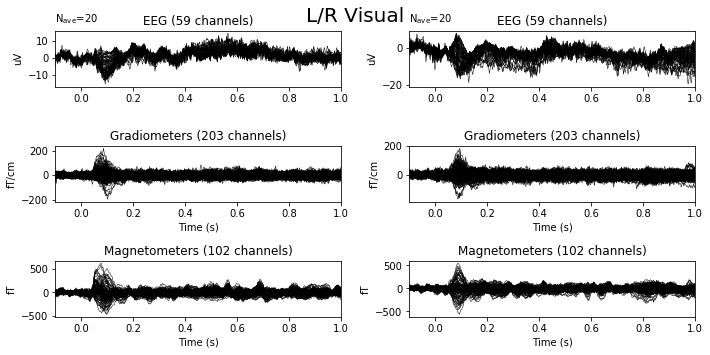

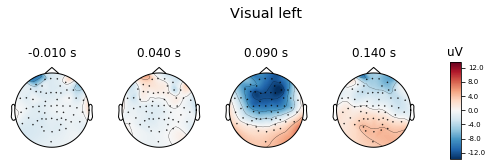

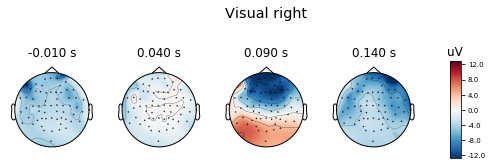

In [31]:
ev_vis_left = epochs['visual/left'].average()
ev_vis_right = epochs['visual/right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('L/R Visual', fontsize=20)
_ = ev_aud_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_aud_right.plot(axes=axs[:, 1], show=False, time_unit='s')

times = np.arange(-0.01, 0.151, 0.05) 
x = mne.Evoked.plot_topomap(ev_aud_left,times=times, ch_type='eeg', time_unit='s', title="Visual left") 
x = mne.Evoked.plot_topomap(ev_aud_right,times=times, ch_type='eeg', time_unit='s', title="Visual right")

24. Render a flowchart of the steps taken and process flow. 

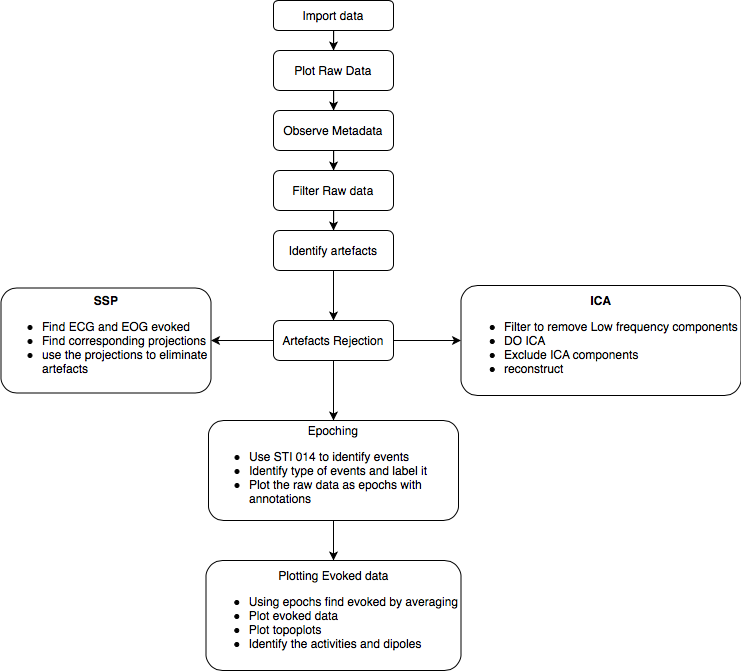

In [32]:
from IPython.display import Image, display
display(Image(filename="MNEflowchart.png"))